In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rich import print
import seaborn as sns

# Part 1: Data Exploration & Preprocessing

1.1 Exploratory Data Analysis (EDA)

- Statistical summary of all features
- Class distribution analysis (critical for classification!)
    - Bar plot of class counts
    - Calculate class imbalance ratio
- Distribution plots for key numerical features
- Correlation matrix/heatmap
- Identification of outliers
- Missing value analysis (if applicable)
- Categorical feature analysis (unique values, frequency)

Required Output:
- Jupyter notebook or Python script with markdown/comments
- Minimum 5 visualizations including class distribution
- Written justification for preprocessing choices (3-4 paragraphs)
- Discussion of class imbalance strategy

In [115]:
# Getting the data into a pandas dataframe
df: pd.DataFrame = pd.read_csv("./data/creditcard.csv")

In [116]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [117]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


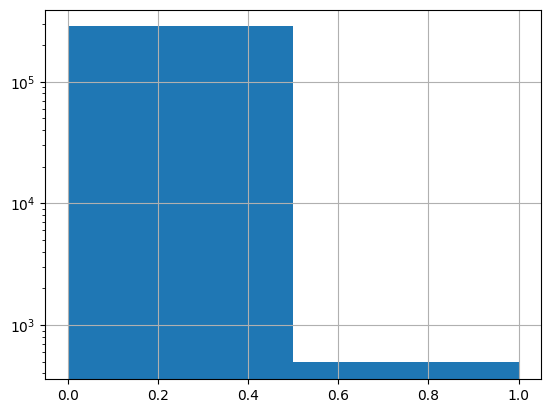

In [118]:
# Plot that shows the diffecne in number of fraud and non-fraud transactions.
hist = df['Class'].hist(bins=2, log=True)

In [119]:
non_fraud = df['Class'].value_counts()[0]
fraud = df['Class'].value_counts()[1]
print("Non Fraud: ", non_fraud)
print("Fraud: ", fraud)
total = non_fraud + fraud
print("Total: ", total)
print("Non Fraud Percentage: ", (non_fraud / total * 100), "%")
print("Fraud Percentage: ", (fraud / total * 100), "%")

Non Fraud:  284315

Fraud:  492

Total:  284807

Non Fraud Percentage:  99.82725143693798 %

Fraud Percentage:  0.1727485630620034 %

Text(0.5, 1.0, 'Feature Correlation Heatmap')

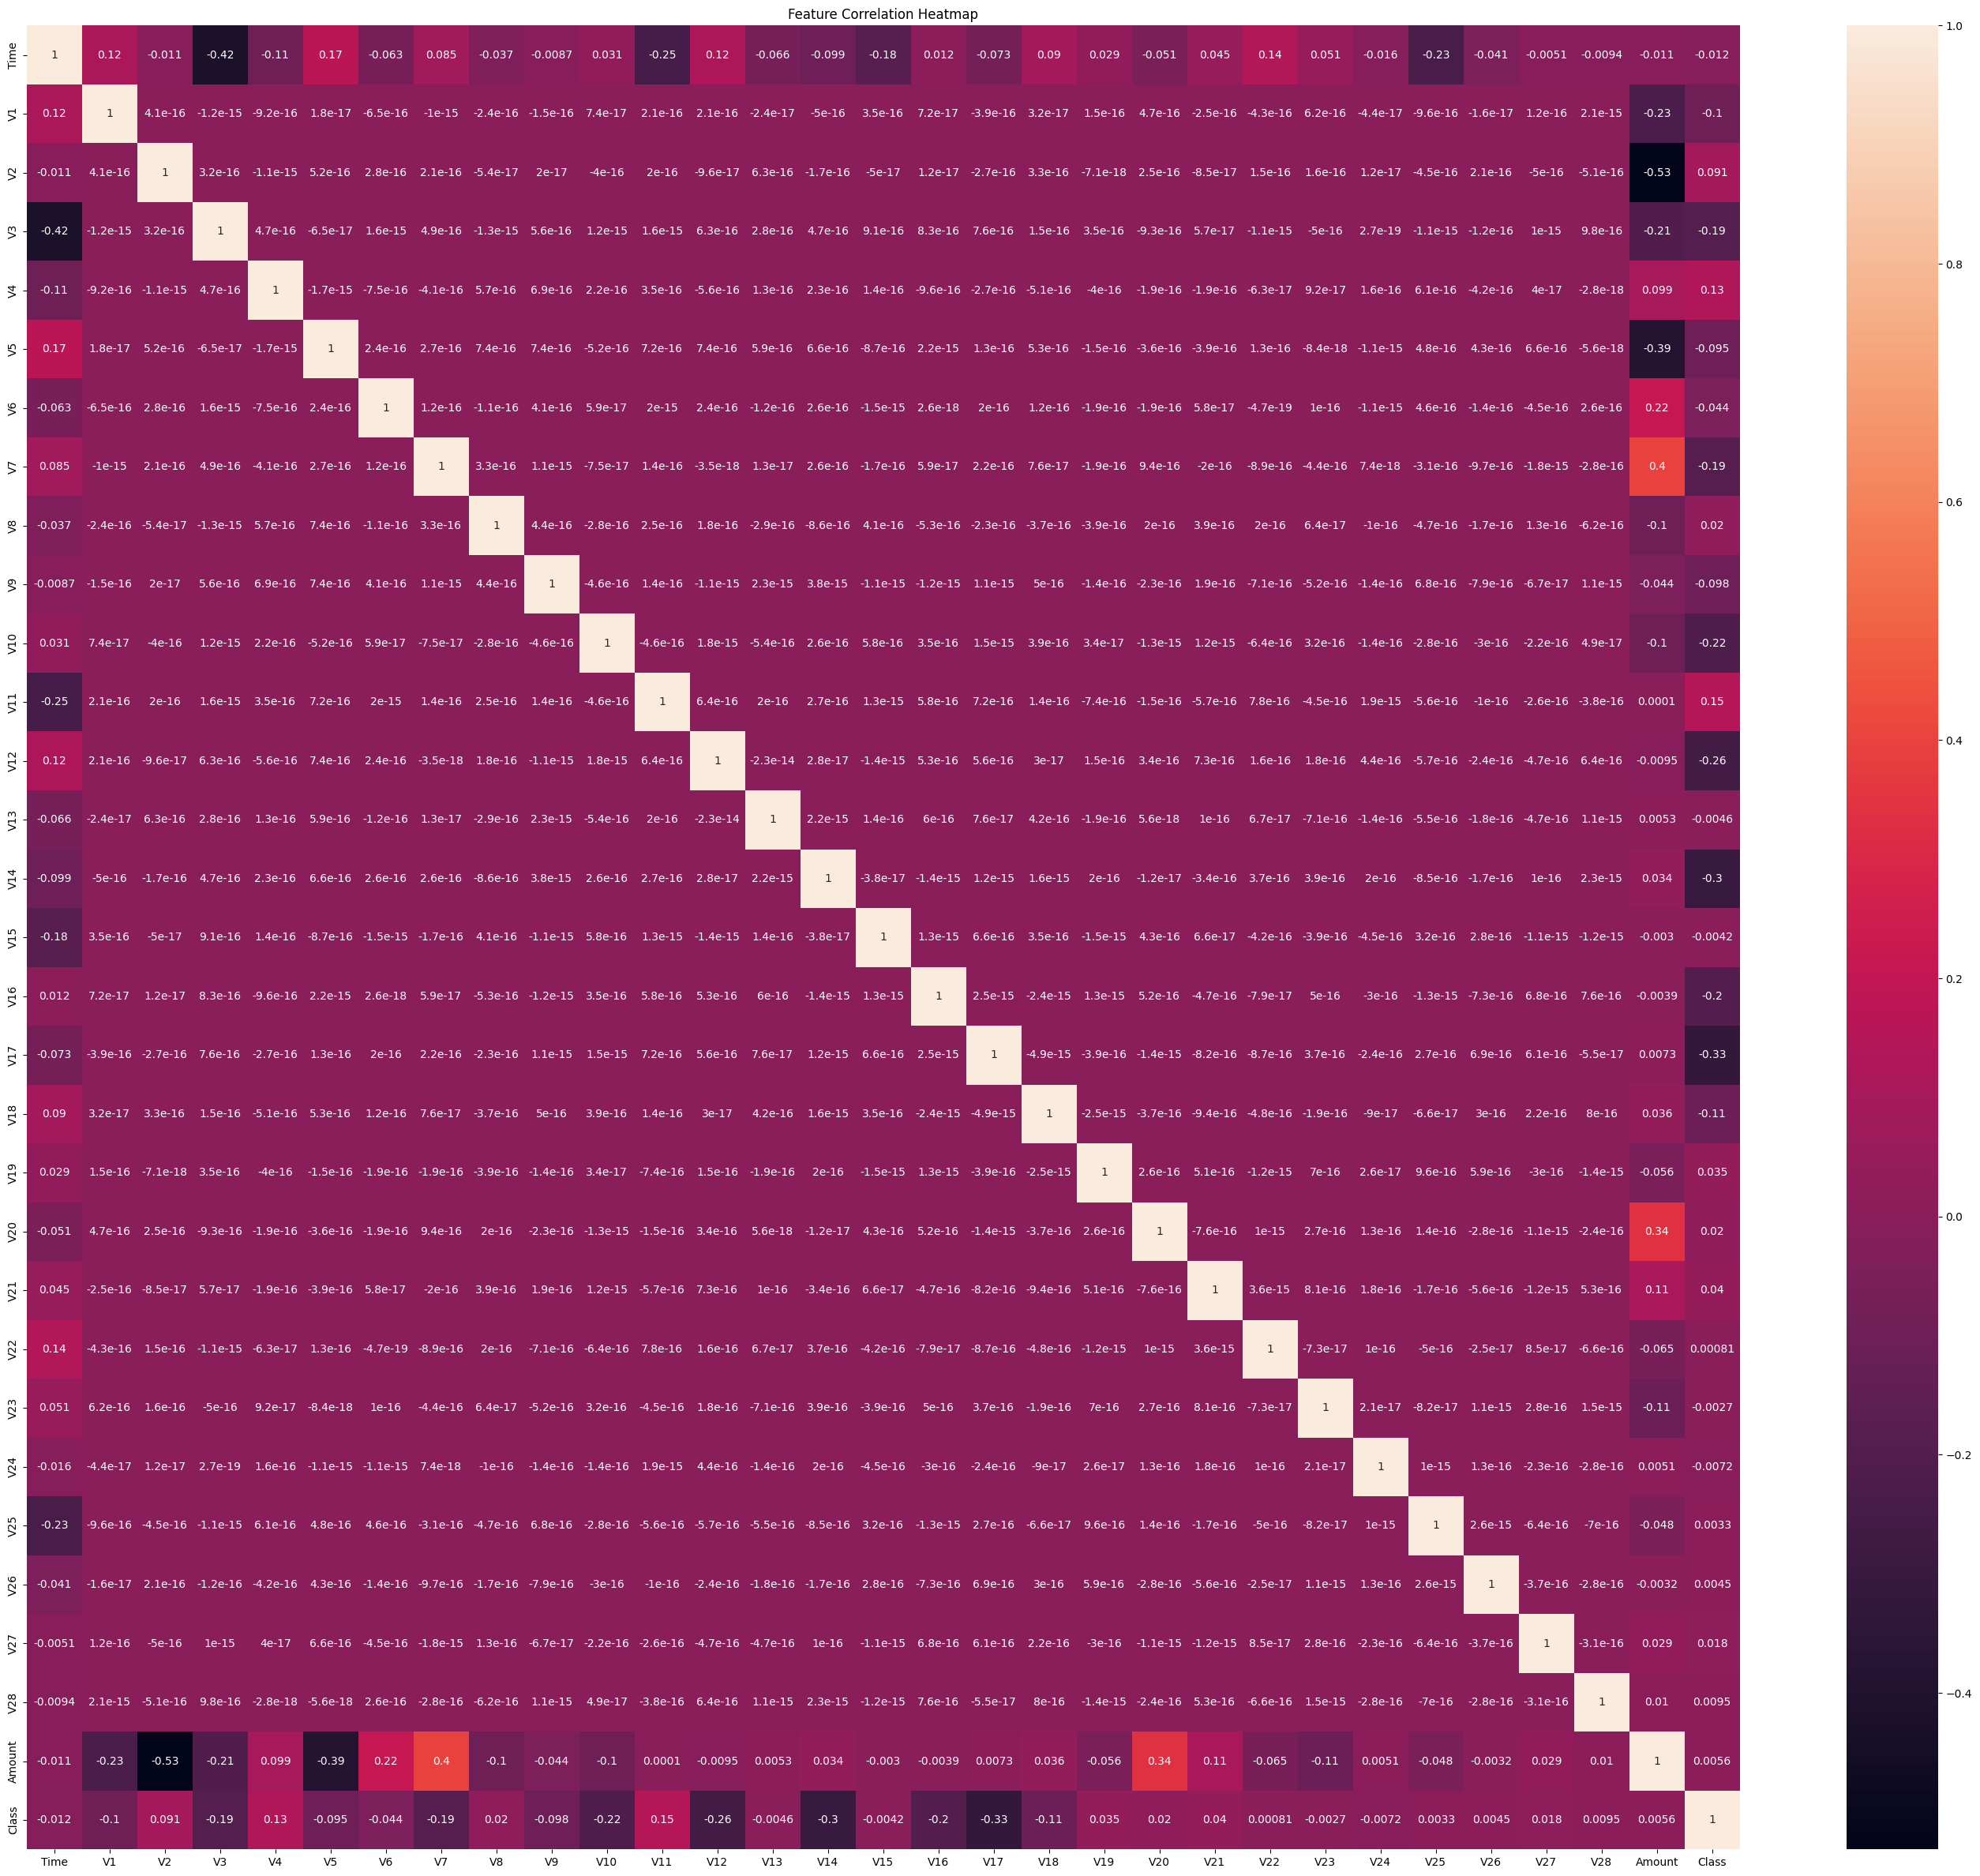

In [120]:
feature_correlation = df.corr()
plt.figure(figsize=(35, 30))
sns.heatmap(feature_correlation, annot=True)
plt.title('Feature Correlation Heatmap')

# Important Features
- v7 (-0.19)
- v10 (-0.22)
- v11 (0.15)
- v12 (-0.26)
- v14 (-0.3)
- v16 (-0.2)
- v17 (-0.33)

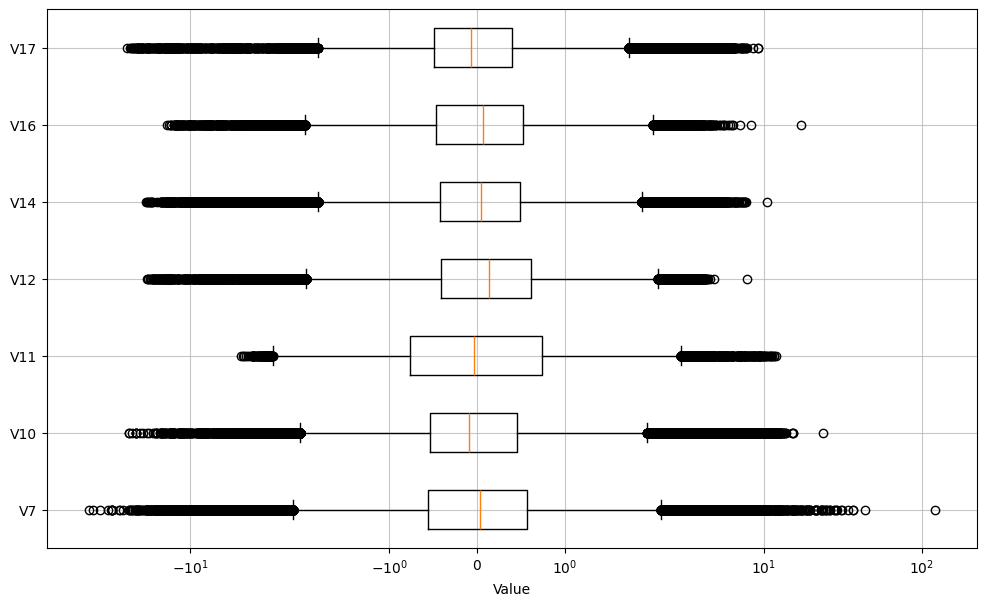

In [121]:
plt.figure(figsize=(12,7))
plt.grid(True, alpha=0.7)
plt.xscale("symlog")
plt.boxplot(x=df[["V7", "V10", "V11", "V12", "V14", "V16", "V17"]], orientation="horizontal", tick_labels=["V7", "V10", "V11", "V12", "V14", "V16", "V17"])
plt.xlabel("Value")
plt.show()

In [122]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [123]:
catagories = set(df["Class"])
non_fraud = df['Class'].value_counts()[0]
fraud = df['Class'].value_counts()[1]

print("Categories (unique values):", catagories)
print("Non-Fraud Transactions:", non_fraud)
print("Fraud Transactions:", fraud)

Categories (unique values):
{0, 1}

Non-Fraud Transactions: 284315

Fraud Transactions: 492

1.2 Data Preprocessing Pipeline

- Handle missing values 
    - <span style="color:#30c8e3">No missing values so we can ignore this</span>
- Encode categorical variables (one-hot, label encoding, etc.)
    - <span style="color:#30c8e3">No categorical variables so we can ignore this</span>
- Feature scaling/normalization
    - <span style="color:#30c8e3">No need to scale features as they all seem pretty close together</span>
- Address class imbalance (if applicable):
    - SMOTE (Synthetic Minority Over-sampling)
        - <span style="color:#30c8e3">Because of how large the class imbalence is I want to do something and this seems like the best option for when class weights isn't an option</span>
    - Undersampling
        - <span style="color:#a61919">Becasue of how large the class imbalence I think removing that many data points is not a good idea.</span>
    - Class weights
        - <span style="color:#30c8e3">This seems like the best option because it doesn't remove any data points and just accounts for the imbalence. The only issue is that it's not available for all models.</span>
    - Or justify why no balancing is needed
        - <span style="color:#30c8e3">We definitly need balancing</span>
- Train/test split with stratification

In [124]:
target_column = "Class"

target_df = df[target_column]
features_df = df.drop(target_column, axis=1)


In [125]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(features_df, target_df, test_size=0.2, stratify=target_df)

smote = SMOTE()
feature_train_res, target_train_res = smote.fit_resample(feature_train, target_train)

# Part 2: Baseline Model
Implement Logistic Regression as your baseline.

Report:
- Training and test performance metrics (see Part 4)
- Confusion Matrix (with visualization)
- Classification Report (precision, recall, F1 per class)
- ROC Curve and AUC (for binary classification)
- Brief analysis of baseline performance
    - Where does the model succeed/fail?
    - Any signs of overfitting or underfitting?

In [126]:
from sklearn.linear_model import LogisticRegression
import time

model = LogisticRegression()
start_time = time.time()
model.fit(feature_train_res, target_train_res)
LR_training_time = time.time() - start_time
print("Total time spent training: ", LR_training_time) # 2.355978012084961
y_pred = model.predict(feature_test)

c:\Users\jucruz\MySchoolWork\WinterQuarter\CSC220\Code\Lab_3\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Total time spent training:  2.286496877670288

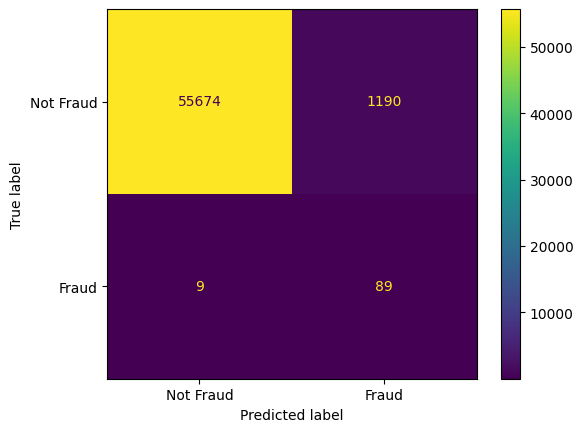

In [127]:
# I got this from the google AI search thing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_LR = confusion_matrix(y_true=target_test, y_pred=y_pred)
matrix_LR = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_LR, display_labels=['Not Fraud', 'Fraud'])
matrix_LR.plot()
plt.show()


In [128]:
from sklearn.metrics import classification_report
print(classification_report(target_test, y_pred))

precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.91      0.13        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962

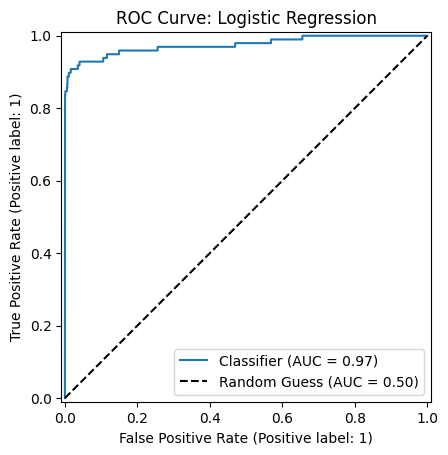

AUC Score: 0.9711872509273827

In [129]:
# Got this from Gemini
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

y_probability = model.predict_proba(feature_test)[:, 1]
RocCurveDisplay.from_predictions(target_test, y_probability)
plt.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
plt.title("ROC Curve: Logistic Regression")
plt.legend()
plt.show()

auc_score_LR = roc_auc_score(target_test, y_probability)
print(f"AUC Score: {auc_score}")


In [130]:
# I got this from gemini
from sklearn.metrics import average_precision_score

aucp_pr_value = average_precision_score(target_test, y_probability)

print(f"AUC-PR (Average Precision): {aucp_pr_value:.4f}")

AUC-PR (Average Precision): 0.7781

# My Analysis
- Where does the model succeed/fail?
    - <span style="color:#30c8e3">It really struggles with the minority class of the data. It does have a good recall score for the minority class, but i feel like that could just be becasue the total number in the denominator is much smaller then what is seen in f1 score and precision score.</span>
- Any signs of overfitting or underfitting?
    - <span style="color:#30c8e3">I wouldn't say there is either as the model seems to guess the classes at a good ratio</span>

# Part 3: Model Implementation & Comparison
Implement at least 4 different classification models. Must include variety:

Required Model Types:

1. At least one ensemble method (Random Forest, Gradient Boosting, XGBoost, AdaBoost)
    - <span style="color:#30c8e3">Random Forest</span>
2. At least one tree-based model (Decision Tree, Extra Trees)
    - <span style="color:#30c8e3">Decision Tree</span>
3. At least one model from your group research (SVM, KNN, Naive Bayes, Neural Network, etc.)
    - <span style="color:#30c8e3">KNN</span>
4. Your choice for the fourth
    - <span style="color:#30c8e3">MLP Classifier</span>

For Each Model:
1. Initial Training

- Train with default hyperparameters
- Record training time
- Calculate all metrics (see Part 4)

2. Document Model Configuration
<details>
<summary>Example:</summary>
model_config = { <br>
    &emsp;'name': 'Random Forest', <br>
    &emsp;'hyperparameters': { <br>
        &emsp;&emsp;'n_estimators': 100, <br>
        &emsp;&emsp;'max_depth': None, <br>
        &emsp;&emsp;'min_samples_split': 2, <br>
        &emsp;&emsp;... <br>
    }, <br>
    &emsp;'preprocessing_requirements': 'Standard scaling applied', <br>
    &emsp;'training_time': 2.34,  # seconds <br>
    &emsp;'class_weight': 'balanced'  # if applicable <br>
}
</details>
3. Feature Importance (if applicable)

- Plot top 10 most important features
- Discuss which features drive predictions
- Compare feature importance across models
4. Model-Specific Analysis

- For tree-based: Visualize decision tree (if feasible)
- For SVM: Discuss kernel choice
- For KNN: Justify k value selection

In [169]:
import os
import json
from sklearn.inspection import permutation_importance
importance_across_models = {}

In [132]:
from sklearn.ensemble import RandomForestClassifier

RFC_model = RandomForestClassifier()
start_time = time.time()
RFC_model.fit(feature_train_res, target_train_res)
RFC_training_time = time.time() - start_time
print("Total time spent training: ", RFC_training_time) # 302.50417494773865
y_pred = RFC_model.predict(feature_test)

Total time spent training:  371.6041829586029

In [172]:
importance = dict(zip(features_df.columns, RFC_model.feature_importances_))
for key, value in importance.items():
    importance[key] = float(value)

sorted_importance = dict(sorted(importance.items(), key=lambda item: item[1], reverse=True)) # I got this from google

counter = 0
top_importance = {}

for key, value in sorted_importance.items():
    counter += 1
    top_importance[key] = value
    if counter == 10 :
        break
print(top_importance)
importance_across_models["Random Forest"] = top_importance

{
    'V14': 0.19883293224253518,
    'V10': 0.1370744383962216,
    'V4': 0.12161108009683082,
    'V12': 0.1178509704404698,
    'V17': 0.07455869897160491,
    'V11': 0.0705805038232212,
    'V3': 0.05055667993484517,
    'V7': 0.033716518401302985,
    'V9': 0.02877497046947695,
    'V2': 0.02833172548761158
}

# Random Forest Classifier
model_config = 
```json 
{
    "n_estimators": 100,
    "criterion": "gini",
    "max_depth": None,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "min_weight_fraction_leaf": 0.0,
    "max_features": "sqrt",
    "max_leaf_nodes": None,
    "min_impurity_decrease": 0.0,
    "bootstrap": True,
    "oob_score": False,
    "n_jobs": None,
    "random_state": None,
    "verbose": 0,
    "warm_start": False,
    "class_weight": None,
    "ccp_alpha": 0.0,
    "max_samples": None,
    "monotonic_cst": None
}
```
- Preprocessing
    - SMOTE on the training data due to class imbalance

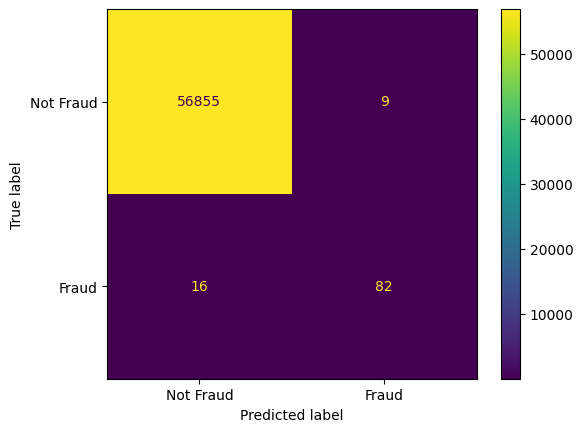

In [133]:
confusion_matrix_RFC = confusion_matrix(y_true=target_test, y_pred=y_pred)
matrix_RFC = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_RFC, display_labels=['Not Fraud', 'Fraud'])
matrix_RFC.plot()
plt.show()

In [134]:
print(classification_report(target_test, y_pred))

precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.84      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

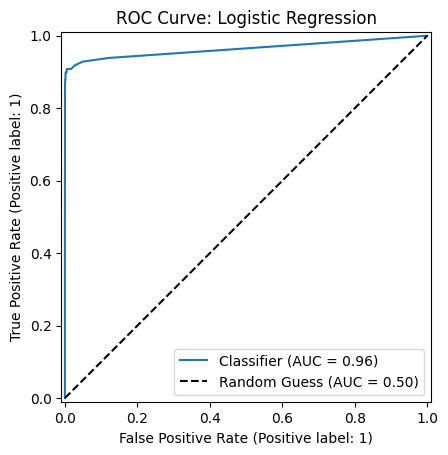

AUC Score: 0.9711872509273827

In [135]:
y_probability = RFC_model.predict_proba(feature_test)[:, 1]
RocCurveDisplay.from_predictions(target_test, y_probability)
plt.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
plt.title("ROC Curve: Logistic Regression")
plt.legend()
plt.show()

auc_score_RFC = roc_auc_score(target_test, y_probability)
print(f"AUC Score: {auc_score}")

In [136]:
from sklearn.metrics import average_precision_score

aucp_pr_value = average_precision_score(target_test, y_probability)

print(f"AUC-PR (Average Precision): {aucp_pr_value:.4f}")

AUC-PR (Average Precision): 0.8406

In [137]:
from sklearn.tree import DecisionTreeClassifier

DTC_model = DecisionTreeClassifier()
start_time = time.time()
DTC_model.fit(feature_train_res, target_train_res)
DTC_training_time = time.time() - start_time
print("Total time spent training: ", DTC_training_time) # 33.697707653045654
y_pred = DTC_model.predict(feature_test)

Total time spent training:  37.590017557144165

In [171]:
importance = dict(zip(features_df.columns, DTC_model.feature_importances_))
for key, value in importance.items():
    importance[key] = float(value)

sorted_importance = dict(sorted(importance.items(), key=lambda item: item[1], reverse=True)) # I got this from google

counter = 0
top_importance = {}

for key, value in sorted_importance.items():
    counter += 1
    top_importance[key] = value
    if counter == 10 :
        break

print(top_importance)
importance_across_models["Decision Tree"] = top_importance

{
    'V14': 0.7935295072848528,
    'V4': 0.04510958603037116,
    'V17': 0.033417763703001015,
    'V12': 0.022482875855267915,
    'V1': 0.012189249797015316,
    'Time': 0.010441984975468348,
    'V3': 0.008518621258562521,
    'V10': 0.007092901607502703,
    'V15': 0.006758272272503129,
    'V23': 0.006078045522482577
}

# Decision Tree Classifier
model_config = 
```json 
{
    "criterion": "gini",
    "splitter": "best",
    "max_depth": None,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "min_weight_fraction_leaf": 0.0,
    "max_features": None,
    "random_state": None,
    "max_leaf_nodes": None,
    "min_impurity_decrease": 0.0,
    "class_weight": None,
    "ccp_alpha": 0.0,
    "monotonic_cst": None
}
```
- Preprocessing
    - SMOTE on the training data due to class imbalance

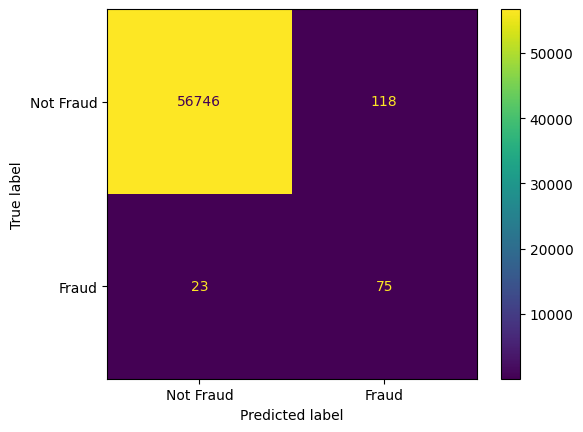

In [138]:
confusion_matrix_DTC = confusion_matrix(y_true=target_test, y_pred=y_pred)
matrix_DTC = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_DTC, display_labels=['Not Fraud', 'Fraud'])
matrix_DTC.plot()
plt.show()

In [139]:
print(classification_report(target_test, y_pred))

precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.77      0.52        98

    accuracy                           1.00     56962
   macro avg       0.69      0.88      0.76     56962
weighted avg       1.00      1.00      1.00     56962

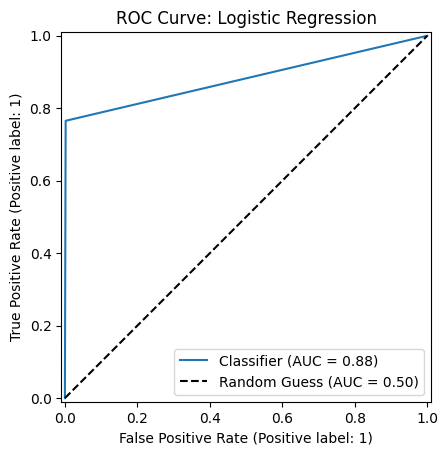

AUC Score: 0.9711872509273827

In [140]:
y_probability = DTC_model.predict_proba(feature_test)[:, 1]
RocCurveDisplay.from_predictions(target_test, y_probability)
plt.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
plt.title("ROC Curve: Logistic Regression")
plt.legend()
plt.show()

auc_score_DTC = roc_auc_score(target_test, y_probability)
print(f"AUC Score: {auc_score}")

In [141]:
from sklearn.metrics import average_precision_score

aucp_pr_value = average_precision_score(target_test, y_probability)

print(f"AUC-PR (Average Precision): {aucp_pr_value:.4f}")

AUC-PR (Average Precision): 0.2978

In [142]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()
start_time = time.time()
KNN_model.fit(feature_train_res, target_train_res)
KNN_training_time = time.time() - start_time
print("Total time spent training: ", KNN_training_time) # 0.07931852340698242
y_pred = KNN_model.predict(feature_test)

Total time spent training:  0.09594106674194336

In [179]:
# Got this from gemini
KNN_result = permutation_importance(
    estimator=KNN_model, 
    X=feature_test, 
    y=target_test, 
    n_repeats=7, 
    scoring='average_precision',
    n_jobs=-1
)

means = KNN_result.importances_mean
stds = KNN_result.importances_std
print("means", means)
print("stds", stds)

means [ 1.83228688e-02  1.48042232e-04  4.01621217e-04  1.41542339e-03
  2.68600475e-04  2.35517427e-04  2.19024711e-05  2.82892425e-04
  2.07645155e-04  4.51025337e-04  1.15785864e-03  5.67749476e-04
  1.74209433e-03  1.76618900e-04  3.45770460e-03  1.19075151e-04
  2.95504270e-04  2.04910443e-03  2.98225888e-04  1.86422806e-04
  6.04612924e-05  2.51628550e-05 -1.17146825e-05  7.18710821e-05
  3.40370004e-05  6.96929843e-06  7.04993699e-05 -1.56927802e-07
  6.29732605e-06  3.06317418e-03]

stds [1.13867992e-03 3.11012707e-04 8.09101413e-05 1.64888557e-04
 1.18005950e-04 7.99434327e-05 1.16267385e-04 9.17411536e-05
 5.22651687e-05 2.65200358e-04 9.00837590e-05 3.22865799e-04
 5.81088791e-05 6.67871351e-05 5.54301869e-04 7.72466215e-05
 1.00793587e-04 8.64752511e-05 7.34727920e-05 6.51403013e-05
 3.28365582e-05 3.72540551e-05 5.44336227e-05 3.28934085e-05
 4.68069023e-05 2.66068105e-05 4.03161648e-05 2.11621518e-05
 1.62486090e-05 2.50300776e-03]

In [183]:
importance = dict(zip(features_df.columns, KNN_result.importances_mean))
for key, value in importance.items():
    importance[key] = float(value)

sorted_importance = dict(sorted(importance.items(), key=lambda item: item[1], reverse=True)) # I got this from google

counter = 0
top_importance = {}

for key, value in sorted_importance.items():
    counter += 1
    top_importance[key] = value
    if counter == 10 :
        break
print(top_importance)
importance_across_models["KNN"] = top_importance

{
    'Time': 0.0183228687873189,
    'V14': 0.003457704602285505,
    'Amount': 0.003063174176003859,
    'V17': 0.0020491044340880207,
    'V12': 0.0017420943337984958,
    'V3': 0.0014154233905726476,
    'V10': 0.0011578586382214814,
    'V11': 0.0005677494762146756,
    'V9': 0.0004510253366147839,
    'V2': 0.0004016212174617072
}

# KNN Classifier
model_config = 
```json 
{
    "n_neighbors": 5,
    "weights": "uniform",
    "algorithm": "auto",
    "leaf_size": 30,
    "p": 2,
    "metric": "minkowski",
    "metric_params": None,
    "n_jobs": None
}
```
- Preprocessing
    - SMOTE on the training data due to class imbalance

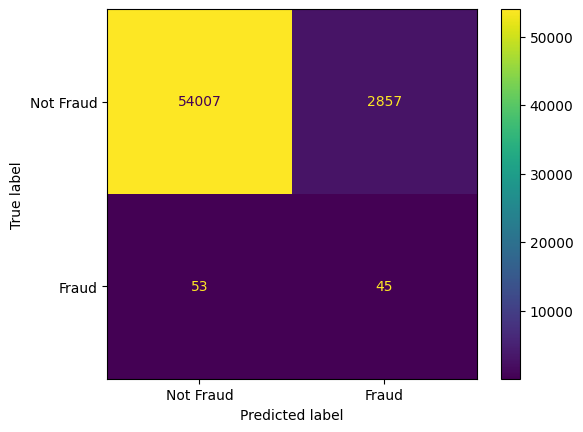

In [143]:
confusion_matrix_KNN = confusion_matrix(y_true=target_test, y_pred=y_pred)
matrix_KNN = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_KNN, display_labels=['Not Fraud', 'Fraud'])
matrix_KNN.plot()
plt.show()

In [144]:
print(classification_report(target_test, y_pred))

precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.02      0.46      0.03        98

    accuracy                           0.95     56962
   macro avg       0.51      0.70      0.50     56962
weighted avg       1.00      0.95      0.97     56962

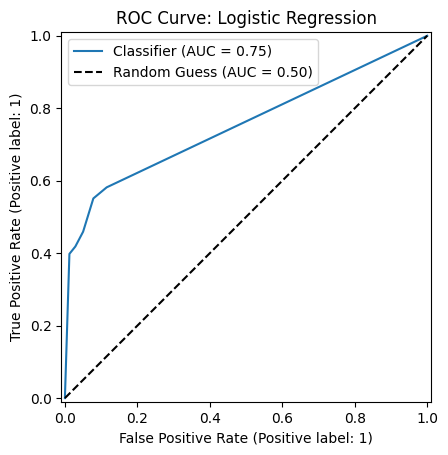

AUC Score: 0.9711872509273827

In [145]:
y_probability = KNN_model.predict_proba(feature_test)[:, 1]
RocCurveDisplay.from_predictions(target_test, y_probability)
plt.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
plt.title("ROC Curve: Logistic Regression")
plt.legend()
plt.show()

auc_score_KNN = roc_auc_score(target_test, y_probability)
print(f"AUC Score: {auc_score}")

In [146]:
from sklearn.metrics import average_precision_score

aucp_pr_value = average_precision_score(target_test, y_probability)

print(f"AUC-PR (Average Precision): {aucp_pr_value:.4f}")

AUC-PR (Average Precision): 0.0240

In [147]:
from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier()
start_time = time.time()
MLP_model.fit(feature_train_res, target_train_res)
MLP_training_time = time.time() - start_time
print("Total time spent training: ", MLP_training_time) # 309.36832451820374
y_pred = MLP_model.predict(feature_test)

Total time spent training:  739.5466840267181

In [180]:
MLP_result = permutation_importance(
    estimator=MLP_model, 
    X=feature_test, 
    y=target_test, 
    n_repeats=7, 
    scoring='average_precision',
    n_jobs=-1
)

means = MLP_result.importances_mean
stds = MLP_result.importances_std
print("means", means)
print("stds", stds)

means [ 8.32028417e-03  1.18492995e-02  1.46214747e-02 -6.45914803e-04
  5.77412699e-02 -5.58874941e-03 -6.71571710e-04  1.13389164e-02
  1.61110317e-02  6.77130630e-04  3.85467851e-02  6.23245705e-03
  1.01000191e-01  1.46728282e-03  1.85999003e-01 -1.90189503e-04
  4.72283528e-03  3.55585748e-02  5.40819692e-03  2.18267206e-04
  4.59970687e-03 -1.18096708e-03 -1.40910435e-03 -9.76662791e-05
 -1.13697391e-04 -7.33236857e-04 -1.65239664e-04 -4.79121263e-04
  6.19956823e-04  1.16299890e-02]

stds [8.11412952e-03 6.22675464e-04 3.40024159e-03 3.03710112e-03
 3.07797999e-03 2.08386804e-03 3.87662944e-03 1.33421910e-03
 2.57302572e-03 2.94813217e-03 5.28731745e-03 4.41629531e-03
 8.42757885e-03 2.20412268e-03 7.92573784e-03 1.45030362e-03
 2.03262178e-03 7.42312217e-03 2.12101809e-03 4.60858122e-04
 1.01992012e-03 9.47585397e-05 7.59443095e-04 3.57015986e-04
 1.00042505e-04 2.83490186e-04 5.56476772e-04 5.72831200e-04
 6.42155025e-04 5.76571191e-03]

In [184]:
importance = dict(zip(features_df.columns, MLP_result.importances_mean))
for key, value in importance.items():
    importance[key] = float(value)

sorted_importance = dict(sorted(importance.items(), key=lambda item: item[1], reverse=True)) # I got this from google

counter = 0
top_importance = {}

for key, value in sorted_importance.items():
    counter += 1
    top_importance[key] = value
    if counter == 10 :
        break
print(top_importance)
importance_across_models["MLP"] = top_importance

{
    'V14': 0.18599900270288555,
    'V12': 0.1010001912838039,
    'V4': 0.057741269863531945,
    'V10': 0.03854678512991621,
    'V17': 0.035558574822835386,
    'V8': 0.01611103173843447,
    'V2': 0.014621474671311616,
    'V1': 0.011849299464479148,
    'Amount': 0.01162998895688724,
    'V7': 0.011338916422327998
}

# MLP Classifier
model_config = 
```json 
{
    "hidden_layer_sizes": (100,),
    "activation": "relu",
    "solver": "adam",
    "alpha": 0.0001,
    "batch_size": "auto",
    "learning_rate": "constant",
    "learning_rate_init": 0.001,
    "max_iter": 200,
    "shuffle": True,
    "random_state": None,
    "tol": 0.0001,
    "verbose": False,
    "warm_start": False,
    "momentum": 0.9,
    "nesterovs_momentum": True,
    "early_stopping": False,
    "validation_fraction": 0.1,
    "beta_1": 0.9,
    "beta_2": 0.999,
    "epsilon": 0.00000001,
    "n_iter_no_change": 10,
    "max_fun": 15000
}
```
- Preprocessing
    - SMOTE on the training data due to class imbalance

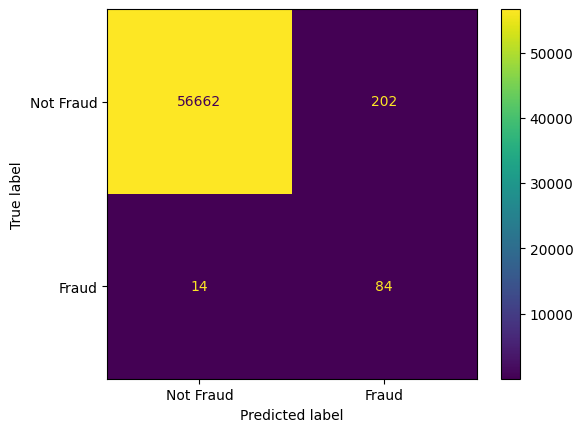

In [148]:
confusion_matrix_MLP = confusion_matrix(y_true=target_test, y_pred=y_pred)
matrix_MLP = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_MLP, display_labels=['Not Fraud', 'Fraud'])
matrix_MLP.plot()
plt.show()

In [149]:
print(classification_report(target_test, y_pred))

precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.29      0.86      0.44        98

    accuracy                           1.00     56962
   macro avg       0.65      0.93      0.72     56962
weighted avg       1.00      1.00      1.00     56962

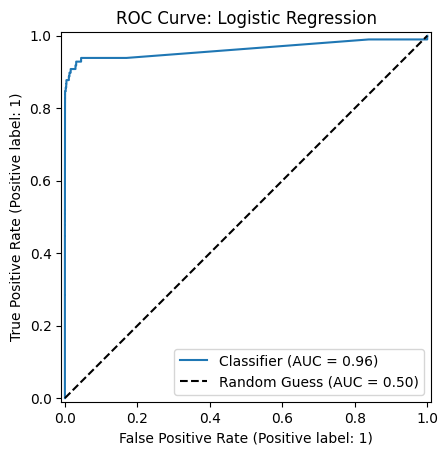

AUC Score: 0.9711872509273827

In [150]:
y_probability = MLP_model.predict_proba(feature_test)[:, 1]
RocCurveDisplay.from_predictions(target_test, y_probability)
plt.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
plt.title("ROC Curve: Logistic Regression")
plt.legend()
plt.show()

auc_score_MLP = roc_auc_score(target_test, y_probability)
print(f"AUC Score: {auc_score}")

In [151]:
from sklearn.metrics import average_precision_score

aucp_pr_value = average_precision_score(target_test, y_probability)

print(f"AUC-PR (Average Precision): {aucp_pr_value:.4f}")

AUC-PR (Average Precision): 0.8044

In [185]:
print(importance_across_models)

{
    'Random Forest': {
        'V14': 0.19883293224253518,
        'V10': 0.1370744383962216,
        'V4': 0.12161108009683082,
        'V12': 0.1178509704404698,
        'V17': 0.07455869897160491,
        'V11': 0.0705805038232212,
        'V3': 0.05055667993484517,
        'V7': 0.033716518401302985,
        'V9': 0.02877497046947695,
        'V2': 0.02833172548761158
    },
    'Decision Tree': {
        'V14': 0.7935295072848528,
        'V4': 0.04510958603037116,
        'V17': 0.033417763703001015,
        'V12': 0.022482875855267915,
        'V1': 0.012189249797015316,
        'Time': 0.010441984975468348,
        'V3': 0.008518621258562521,
        'V10': 0.007092901607502703,
        'V15': 0.006758272272503129,
        'V23': 0.006078045522482577
    },
    'KNN': {
        'Time': 0.0183228687873189,
        'V14': 0.003457704602285505,
        'Amount': 0.003063174176003859,
        'V17': 0.0020491044340880207,
        'V12': 0.0017420943337984958,
        'V3': 0.0014154233905726476,
        'V10': 0.0011578586382214814,
        'V11': 0.0005677494762146756,
        'V9': 0.0004510253366147839,
        'V2': 0.0004016212174617072
    },
    'MLP': {
        'V14': 0.18599900270288555,
        'V12': 0.1010001912838039,
        'V4': 0.057741269863531945,
        'V10': 0.03854678512991621,
        'V17': 0.035558574822835386,
        'V8': 0.01611103173843447,
        'V2': 0.014621474671311616,
        'V1': 0.011849299464479148,
        'Amount': 0.01162998895688724,
        'V7': 0.011338916422327998
    }
}

In [186]:
os.makedirs("data", exist_ok=True)

with open("./data/importaces.json", "w") as f:
    json.dump(importance_across_models, f, indent=4)

# Part 4: Model Evaluation
Calculate the following metrics for ALL models (baseline + 4):

Required Metrics:

For Binary Classification:

- Accuracy (with discussion of when it's misleading)
- Precision (per class and macro/weighted average)
- Recall/Sensitivity (per class and macro/weighted average)
- F1-Score (per class and macro/weighted average)
- AUC-ROC (Area Under ROC Curve)
- AUC-PR (Area Under Precision-Recall Curve - important for imbalanced data)
- Confusion Matrix

For Multiclass Classification:

- All of the above (adapted for multiclass)
- Macro-average and Weighted-average metrics
- Per-class performance analysis

Create Comparison Visualizations:

1. Metrics Comparison Table

| Model            | Accuracy | Precision | Recall | F1    | AUC-ROC | Train Time |
|------------------|----------|-----------|--------|-------|---------|------------|
| Logistic Reg     | 0.92     | 0.85      | 0.78   | 0.81  | 0.94    | 0.12s      |
| Random Forest    | 0.94     | 0.88      | 0.82   | 0.85  | 0.96    | 2.45s      |
| ...              | ...      | ...       | ...    | ...   | ...     | ...        |

2. Bar Charts: Compare metrics across models

3. Confusion Matrices: For ALL models (use subplots)

4. ROC Curves: Plot all models on same graph for comparison

5. Precision-Recall Curves: Especially important for imbalanced datasets

6. Learning Curves (Optional but recommended): For your top 2 models

- Plot training vs validation score as function of training size
- Helps diagnose overfitting/underfitting

Analysis Requirements:
- Which metric is most important for your problem? Why?
- Discuss the precision-recall tradeoff
- For imbalanced data: Why is accuracy potentially misleading?
- Compare performance on minority vs. majority class

# Part 5: Hyperparameter Tuning
Select your best performing model from Part 3 and optimize it.

Required Approach:
Use GridSearchCV or RandomizedSearchCV
<details>
<summary>Implementation:</summary>
from sklearn.model_selection import GridSearchCV <br>
<br>
param_grid = { <br>
&emsp;    # Define at least 3 hyperparameters to tune <br>
&emsp;    # Each with at least 3 different values <br>
&emsp;    # Example for Random Forest: <br>
&emsp;    'n_estimators': [100, 200, 300], <br>
&emsp;    'max_depth': [10, 20, 30, None], <br>
&emsp;    'min_samples_split': [2, 5, 10], <br>
&emsp;    'class_weight': ['balanced', None]  # if imbalanced <br>
} <br>
<br>
grid_search = GridSearchCV( <br>
&emsp;    estimator=your_model, <br>
&emsp;    param_grid=param_grid, <br>
&emsp;    cv=5,  # 5-fold stratified cross-validation <br>
&emsp;    scoring='f1',  # or 'roc_auc', 'f1_weighted', etc. <br>
&emsp;    n_jobs=-1, <br>
&emsp;    verbose=1 <br>
) <br>
<br>
grid_search.fit(X_train, y_train)
</details>

Document:
- Initial hyperparameters vs. optimal hyperparameters
- Performance improvement (before/after tuning)
    - Show metrics table comparing both versions
- Cross-validation scores (mean and std)
- Training time comparison
- Scoring metric choice: Why did you choose that metric for optimization?
- Discussion: Was the tuning worth the computational cost?
Additional Consideration:
- If using imbalanced data, ensure CV is stratified
- Consider using multiple scoring metrics
- Discuss any tradeoffs (e.g., precision vs. recall)

Part 6: Reflections
Write a comprehensive report addressing:

1. Model Selection Justification
- Why did certain models perform better than others?
- What characteristics of the data favor specific algorithms?
- Were there any surprising results?
- How did class imbalance (if present) affect different models?
2. Feature Analysis
- Which features were most important across models?
- Did feature importance differ between models?
- Any features that were unexpectedly important/unimportant?
- Recommendations for feature engineering
3. Practical Considerations
- Which model would you deploy in production and why?
    - Consider: accuracy, speed, interpretability, maintenance
- Trade-offs:
    - Accuracy vs. interpretability vs. speed
    - Precision vs. recall (what's more important for your use case?)
- Ethical considerations (especially for sensitive domains):
    - Potential biases in the model
    - Fairness across different groups
    - Consequences of false positives vs. false negatives
- Potential limitations of your models
4. Future Improvements
- What would you try next to improve performance?
- Additional data that would be helpful
- Different approaches to consider:
    - Ensemble methods (stacking, voting)
    - Deep learning
    - Different feature engineering
    - Cost-sensitive learning
- How would you monitor model performance in production?